In [1]:
import numpy as np
import pandas as pd
import os
from collections import Counter

import mode
from mode import process_data,visualize_data,mean_parameter,se_parameter,worst_parameter
from mode import split_model,ttdata

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
df= pd.read_csv('breast-cancer.csv')

In [3]:
print("Column names in data:", df.columns)

Column names in data: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


# Pre-processing and Visualizing data

In [4]:
# Creating a folder if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

In [5]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [6]:
process_data(df)


 	 The data has 569 diagnosis, 212 malignant and 357 benign.


classes are ['M' 'B']


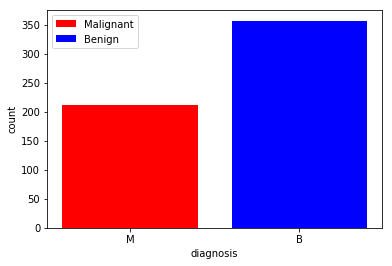

In [7]:
visualize_data(df)

In [8]:
#converting labels into integer values for binary classification
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

# For Mean Parameters

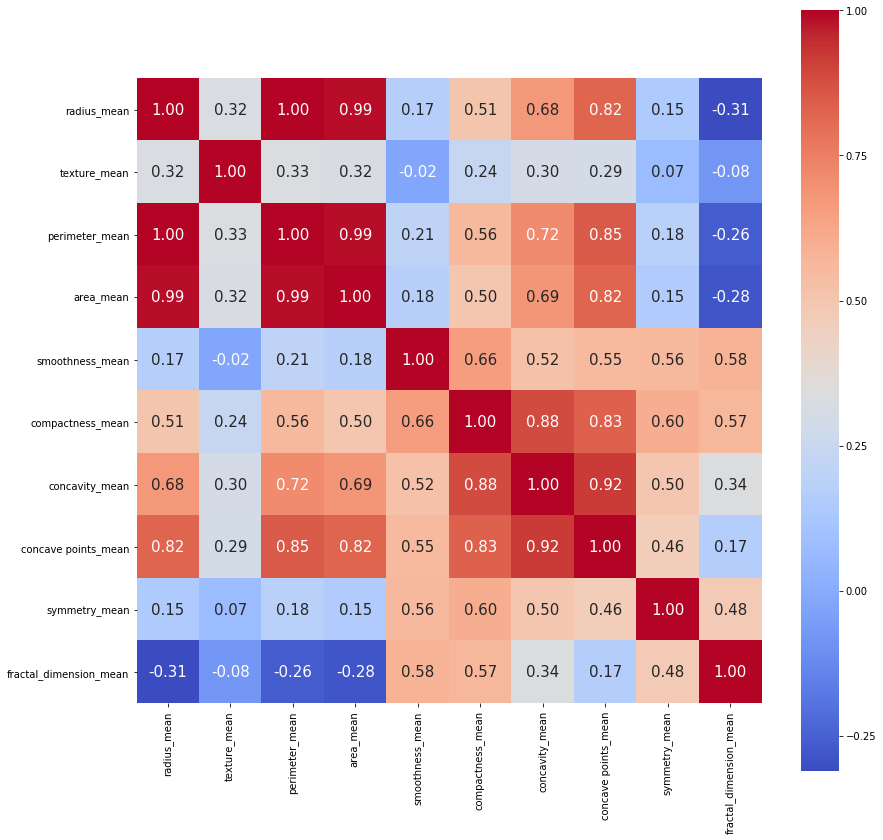

In [9]:
mean_parameter(df)

In [10]:
selected_parameter_mean = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [11]:
mean_acc=[]
mean_cvs=[]

# Splitting the model for training and testing with a test_size of 20 %

In [12]:
train,test=split_model(df)

train data shape (455, 31)
test data shape (114, 31)


In [13]:
train_X,train_y,test_X,test_y=ttdata(train,test,selected_parameter_mean)

# Logistic Regression Classifier

In [14]:
clf = LogisticRegression()
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 90.35%
Cross validation score: 89.25% (+/- 7.70%)


# Nearest Neighbors Classifier

In [15]:
clf = KNeighborsClassifier(n_neighbors=15,p=2,algorithm='kd_tree',leaf_size=20)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 86.84%
Cross validation score: 90.57% (+/- 5.92%)


# Decision Tree Classifier

In [16]:
clf = DecisionTreeClassifier(splitter='best')
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 87.72%
Cross validation score: 91.22% (+/- 4.52%)


# Random Forest Classifier

In [17]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 85.96%
Cross validation score: 93.64% (+/- 3.73%)


# Naive Bayes Classifier

In [18]:
clf = GaussianNB(var_smoothing=1e-7)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 91.66% (+/- 5.59%)


# AdaBoost classifier

In [19]:
clf=AdaBoostClassifier(n_estimators=20,learning_rate=1)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 92.11%
Cross validation score: 93.41% (+/- 6.94%)


# Radial Basis Function Classifier

In [20]:
kernel = 1.0 * RBF([1.0])
clf = GaussianProcessClassifier(kernel=kernel,max_iter_predict=100)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 85.09%
Cross validation score: 89.69% (+/- 5.54%)


# Support Vector Machine Classifier

In [21]:
clf = SVC(C=4.0,kernel='linear')
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 87.72%
Cross validation score: 91.22% (+/- 4.53%)


# Quadratic Discriminant Analysis Classifier

In [22]:
clf = QuadraticDiscriminantAnalysis(reg_param=1.0)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 91.23%
Cross validation score: 87.71% (+/- 7.29%)


# MultiLayer Perceptron Classifier

In [23]:
clf = MLPClassifier(hidden_layer_sizes=(32,),alpha=1, max_iter=1000,activation='relu',solver='adam'
                    ,shuffle=False)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 91.23%
Cross validation score: 57.30% (+/- 36.81%)


# For Standard Error(SE) Parameters

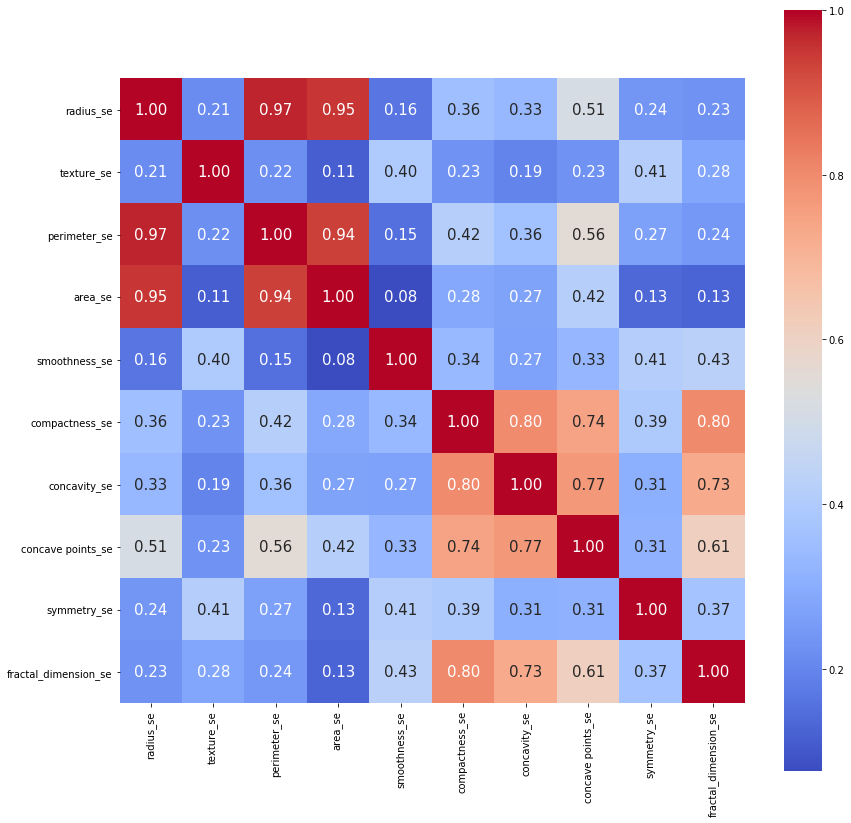

In [24]:
se_parameter(df)

In [25]:
selected_parameter_se = ['texture_se','perimeter_se','smoothness_se','compactness_se','symmetry_se']

In [26]:
se_acc=[]
se_cvs=[]

# Splitting the model for training and testing with a test_size of 20 %

In [27]:
train,test=split_model(df)

train data shape (455, 31)
test data shape (114, 31)


In [28]:
train_X,train_y,test_X,test_y=ttdata(train,test,selected_parameter_se)

# Logistic Regression Classifier

In [29]:
clf = LogisticRegression(tol=1e-4)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 80.89% (+/- 7.50%)


# Nearest Neighbors Classifier

In [30]:
clf = KNeighborsClassifier(n_neighbors=15,p=2,algorithm='ball_tree',leaf_size=20)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 86.84%
Cross validation score: 81.33% (+/- 6.69%)


# Decision Tree Classifier

In [31]:
clf = DecisionTreeClassifier(splitter='best')
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 84.21%
Cross validation score: 77.15% (+/- 3.67%)


# Random Forest Classifier

In [32]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 82.46%
Cross validation score: 81.11% (+/- 3.62%)


# Naive Bayes Classifier

In [33]:
clf = GaussianNB(var_smoothing=1e-7)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 76.50% (+/- 5.58%)


# AdaBoost classifier

In [34]:
clf=AdaBoostClassifier(n_estimators=20,learning_rate=1)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 84.21%
Cross validation score: 82.20% (+/- 2.17%)


# Radial Basis Function Classifier

In [35]:
kernel = 1.0 * RBF([1.0])
clf = GaussianProcessClassifier(kernel=kernel,max_iter_predict=100)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 88.60%
Cross validation score: 80.67% (+/- 7.88%)


# Support Vector Machine Classifier

In [36]:
clf = SVC(C=4.0,kernel='linear')
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 80.89% (+/- 6.81%)


# Quadratic Discriminant Analysis Classifier

In [37]:
clf = QuadraticDiscriminantAnalysis(reg_param=1.0)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 86.84%
Cross validation score: 78.69% (+/- 3.96%)


# MultiLayer Perceptron Classifier

In [38]:
clf = MLPClassifier(hidden_layer_sizes=(32,),alpha=1, max_iter=1000,activation='relu',solver='adam',
                    shuffle=False)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 80.89% (+/- 7.50%)


# For Worst Parameters

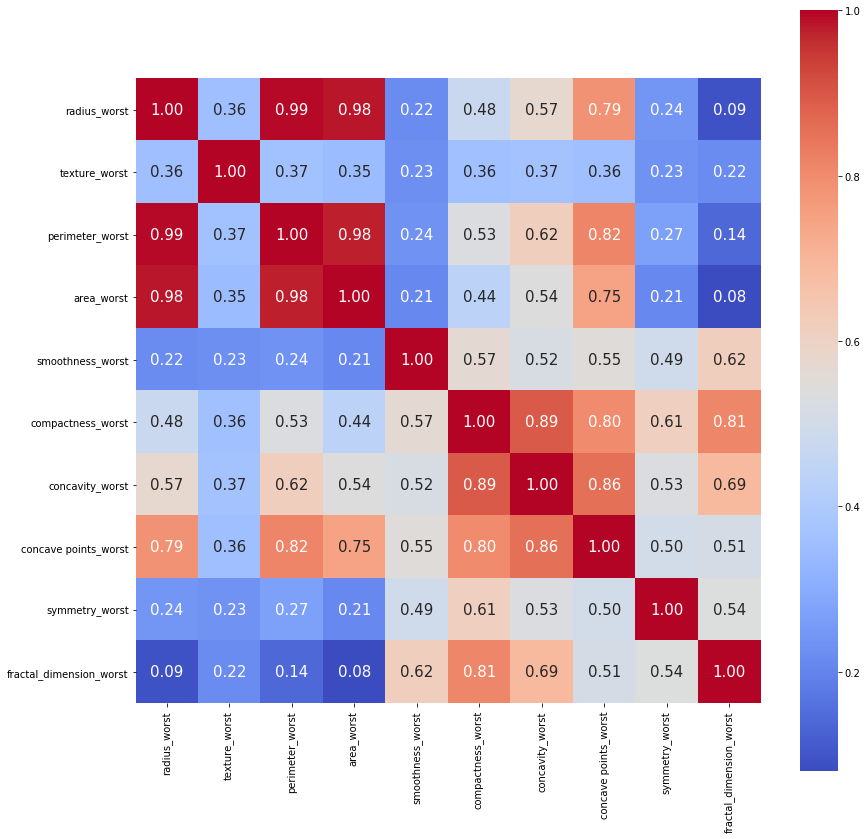

In [39]:
worst_parameter(df)

In [40]:
selected_parameter_worst = ['texture_worst','perimeter_worst','smoothness_worst','compactness_worst','symmetry_worst']

In [41]:
worst_acc=[]
worst_cvs=[]

# Splitting the model for training and testing with a test_size of 20 %

In [42]:
train,test=split_model(df)

train data shape (455, 31)
test data shape (114, 31)


In [43]:
train_X,train_y,test_X,test_y=ttdata(train,test,selected_parameter_worst)

# Logistic Regression Classifier

In [44]:
clf = LogisticRegression()
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 95.61%
Cross validation score: 94.07% (+/- 3.26%)


# Nearest Neighbors Classifier

In [45]:
clf = KNeighborsClassifier(n_neighbors=15,p=2,algorithm='kd_tree',leaf_size=20)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 93.86%
Cross validation score: 94.95% (+/- 1.69%)


# Decision Tree Classifier

In [46]:
clf = DecisionTreeClassifier(splitter='best')
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 90.35%
Cross validation score: 94.08% (+/- 3.20%)


# Random Forest Classifier

In [47]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 95.61%
Cross validation score: 96.05% (+/- 2.23%)


# Naive Bayes Classifier

In [48]:
clf = GaussianNB(var_smoothing=1e-7)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 95.61%
Cross validation score: 95.17% (+/- 2.61%)


# AdaBoost classifier

In [49]:
clf=AdaBoostClassifier(n_estimators=20,learning_rate=1)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 93.86%
Cross validation score: 94.28% (+/- 2.58%)


# Radial Basis Function Classifier

In [50]:
kernel = 1.0 * RBF([1.0])
clf = GaussianProcessClassifier(kernel=kernel,max_iter_predict=100)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 92.98%
Cross validation score: 94.73% (+/- 1.58%)


# Support Vector Machine Classifier

In [51]:
clf = SVC(C=3.0,kernel='linear')
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 95.61%
Cross validation score: 95.83% (+/- 1.62%)


# Quadratic Discriminant Analysis Classifier

In [52]:
clf = QuadraticDiscriminantAnalysis(reg_param=1.0)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 95.61%
Cross validation score: 91.66% (+/- 6.07%)


# MultiLayer Perceptron Classifier

In [53]:
clf = MLPClassifier(hidden_layer_sizes=(32,),alpha=1, max_iter=1000,activation='relu',solver='adam',
                   shuffle=False)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 96.49%
Cross validation score: 83.30% (+/- 40.51%)


# Visualizing the performance matrix

In [54]:
index=['Logistic Regression','Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
       'AdaBoost','Radial Basis Function','Support Vector Machine', 'Quadratic Discriminant Analysis',
       'MultiLayer Perceptron']
data={'mean_accuracy':mean_acc,'mean_cvs':mean_cvs,'se_accuracy':se_acc,'se_cvs':se_cvs,
      'worst_accuracy':worst_acc,'worst_cvs':worst_cvs}
dataframe = pd.DataFrame(data,index=index)
dataframe

mean_acc  mean_cvs    se_acc    se_cvs  \
Logistic Regression              0.903509  0.892496  0.894737  0.808880   
Nearest Neighbors                0.868421  0.905660  0.868421  0.813324   
Decision Tree                    0.877193  0.912180  0.842105  0.771465   
Random Forest                    0.859649  0.936358  0.824561  0.811077   
Naive Bayes                      0.894737  0.916625  0.894737  0.764993   
AdaBoost                         0.921053  0.934112  0.842105  0.821970   
Radial Basis Function            0.850877  0.896867  0.885965  0.806683   
Support Vector Machine           0.877193  0.912205  0.894737  0.808904   
Quadratic Discriminant Analysis  0.912281  0.877110  0.868421  0.786876   
MultiLayer Perceptron            0.912281  0.572972  0.894737  0.808880   

                                 worst_acc  worst_cvs  
Logistic Regression               0.956140   0.940705  
Nearest Neighbors                 0.938596   0.949496  
Decision Tree                     0.903509   0.940753  
Random Forest                     0.956140   0.960462  
Naive Bayes                       0.956140   0.951695  
AdaBoost                          0.938596   0.942831  
Radial Basis Function             0.929825   0.947298  
Support Vector Machine            0.956140   0.958264  
Quadratic Discriminant Analysis   0.956140   0.916624  
MultiLayer Perceptron             0.964912   0.832988

# As it can be seen that the accuracy is most in MLP Classifier, lets use it to predict the testing dataset.

In [55]:
train,test=split_model(df)

train data shape (455, 31)
test data shape (114, 31)


In [56]:
train_X,train_y,test_X,test_y=ttdata(train,test,selected_parameter_worst)

In [57]:
clf = MLPClassifier(hidden_layer_sizes=(32,),alpha=1, max_iter=1000,activation='relu',solver='adam',
                   shuffle=False)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)

In [58]:
prediction

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0])

# Calculation of loss function

In [60]:
loss = 0

for predicted_value,actual_value in zip(prediction,test_y):
    if predicted_value == actual_value:
        pass
    else:
        loss += 1

print("Loss :",loss/len(prediction)*100,"%")

Loss : 6.140350877192982 %
